In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

x, y = twospirals(400)
x, y = x/10, y.reshape(-1)
xx, yy = np.array(x), np.reshape(y, (-1,1))
print(x.shape, y.shape)

(800, 2) (800,)


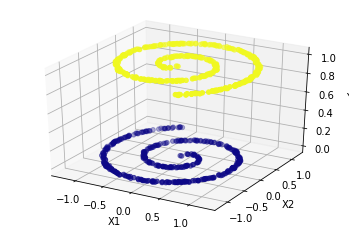

In [3]:
x1 = xx[:,0]
x2 = xx[:,1]

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='plasma')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

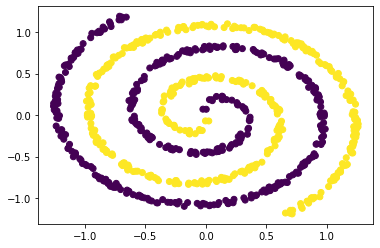

In [4]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y)

### Using Neural Network

In [21]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
layer3 = tnn.Sigmoid()
# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [6]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(x1, x2, y, c=y, cmap='plasma')
        ax.scatter(x1, x2, yout, c=(yout>0.5).reshape(-1), cmap='plasma')#, c=yout, cmap='plasma')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7710198878017729


100 Error =  0.693870171485234


200 Error =  0.6929633745599889


300 Error =  0.6888620289641202


400 Error =  0.6647363291241066


500 Error =  0.6603223130064636


TclError: invalid command name "pyimage10"

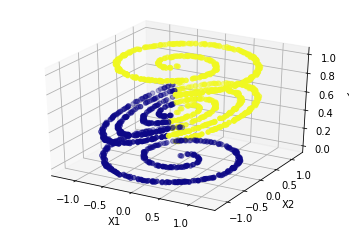

In [7]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='plasma')
ax.scatter(x1, x2, yout, c=(yout>0.5).reshape(-1), cmap='plasma')#, c=yout, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [8]:
error = tnn.CrossEntropyBinary().loss(yout, yy)
pre_err = error
error_list = [error,]

## Repeat steps below to add new neuron to the network

In [9]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [22]:
new_neurons = 4
noise_new = 0.0
noise_old = 0.0
noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1.weights.shape)
noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1.bias.shape)

layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

l1_add = tnn.LinearLayer(2, new_neurons, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(new_neurons, 1, optimizer=optimizer)

new_w1 = np.hstack([layer1.weights+noise_old_w1, l1_add.weights])
new_b1 = np.hstack([layer1.bias+noise_old_b1, l1_add.bias])

i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o),
                          l2_add.weights.reshape(2,i_//2,o_)*noise_new],
                         axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_b2 = deepcopy(layer2.bias)

## Creating a new network with added neuron

In [23]:
optimizer = tnn.Adam()
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)
layer3 = tnn.Sigmoid()

In [24]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7307895407638105


100 Error =  0.6587960048632179


200 Error =  0.6435739344227628


300 Error =  0.5979077713092943


400 Error =  0.5593554721885052


500 Error =  0.5312077336601156


600 Error =  0.5151767833506834


700 Error =  0.5070504552585502


800 Error =  0.5019010809678144


900 Error =  0.4986875054027769


1000 Error =  0.4962346709487835


1100 Error =  0.49436472295008316


1200 Error =  0.49298267871022344


1300 Error =  0.4917719571689363


1400 Error =  0.49073748389663224


1500 Error =  0.4899509875490184


1600 Error =  0.4891966744960778


1700 Error =  0.4885634176817071


1800 Error =  0.48801147242961707


1900 Error =  0.48751305827874475


2000 Error =  0.4870521059707504


2100 Error =  0.48666377600545063


2200 Error =  0.486345654824347


2300 Error =  0.485962715105737


2400 Error =  0.4856290786747829


2500 Error =  0.48531802484033304


2600 Error =  0.48508006432754824


2700 Error =  0.48482874953947475


2800 Error =  0.484584667

TclError: invalid command name "pyimage31"

In [ ]:
pre_err - error   ### ---> the more the better

In [ ]:
pre_err = error
error_list.append(error)

#### If the additional neuron was not helpful, reset the network

In [ ]:
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

#### Total number of neurons

In [25]:
n_hidden = len(layer1.bias)
n_hidden

5

#### Plots

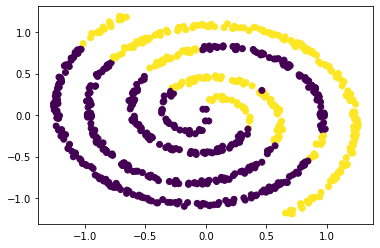

In [26]:
%matplotlib inline
yout = net.forward(xx)
out = (yout>0.5).reshape(-1)
plt.scatter(x1, x2, c=out)

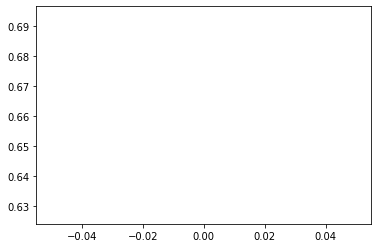

In [27]:
plt.plot(error_list)

In [39]:
layer1.del_zee.std(axis=0)

array([0.51902252, 0.06745254, 0.31981341, 0.05609052, 0.09396149])

In [40]:
dx.std(axis=0)

array([0.35132035, 0.36649389])

In [41]:
layer2.del_output.std(axis=0)

array([0.09796255])

In [42]:
layer2.del_zee.std(axis=0)

array([0.85682436, 0.06745255, 0.31981199, 1.21843134, 0.0939615 ,
       0.51731238, 0.30701478, 0.89530905, 0.05474714, 0.36417972])

In [45]:
a,b = layer1.del_zee.std(), dx.std()
a, b, a/b

(0.27864412525911847, 0.35898755378961594, 0.7761943897988658)

In [46]:
a,b=layer2.del_output.std(), layer2.del_zee.std()
a,b,a/b

(0.09796254771318938, 0.6027988858414334, 0.16251282146357265)

### Training the same network end to end -- for comparision

In [47]:
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
layer3_ = tnn.Sigmoid()

In [48]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
    net_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7679375678659207


100 Error =  0.6595642790271415


200 Error =  0.6481622351045607


300 Error =  0.6443934344395956


400 Error =  0.6438131046961394


500 Error =  0.643628438416832


600 Error =  0.642817192769354


700 Error =  0.6412262369436916


800 Error =  0.6398110716061501


900 Error =  0.6272821120280662


1000 Error =  0.6092175640045049


1100 Error =  0.5892359055378141


1200 Error =  0.5736111031184422


1300 Error =  0.5670763192546079


1400 Error =  0.563434900594826


1500 Error =  0.5604147948151487


1600 Error =  0.5586443004388465


1700 Error =  0.5572819149074709


1800 Error =  0.5564003685579765


1900 Error =  0.5551292014852648


2000 Error =  0.5518585377969558


2100 Error =  0.5506769030976213


2200 Error =  0.5496134674889838


2300 Error =  0.5487852464730572


2400 Error =  0.5482147371691961


2500 Error =  0.547647784688982


2600 Error =  0.5472357057126979


2700 Error =  0.5467451342637656


2800 Error =  0.5464903529370259


2

TclError: invalid command name "pyimage42"

In [49]:
error, error_

(0.4786486911245356, 0.5266213470696506)

## Add New Layer to the last layer

In [50]:
n_hidden2 = 5
optimizer = tnn.SGD()
w2_layer = tnn.WeightsLayer(n_hidden*2, n_hidden2, optimizer=optimizer)
w3_layer = tnn.WeightsLayer(n_hidden2, 1, optimizer=optimizer)

for epoch in range(100000):
    wout = w3_layer.forward(w2_layer.weights)
    dw = wout - layer2.weights
    dw2 = w3_layer.backward(dw/dw.shape[1]) 
    w2_layer.del_weights = dw2
    
    w2_layer.update()
    w3_layer.update()
    
    if epoch%10000 == 0:
        error__ = (dw**2).mean()
        print(epoch, 'Error = ', error__)

0 Error =  36.19295705373217
10000 Error =  8.5468148700039e-30
20000 Error =  8.5468148700039e-30
30000 Error =  8.5468148700039e-30
40000 Error =  8.5468148700039e-30
50000 Error =  8.5468148700039e-30
60000 Error =  8.5468148700039e-30
70000 Error =  8.5468148700039e-30
80000 Error =  8.5468148700039e-30
90000 Error =  8.5468148700039e-30


In [51]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                          weights=copy.deepcopy(layer1.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    weights=copy.deepcopy(w2_layer.weights),
                                    optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden2,1,
                                    weights=np.vstack([w3_layer.weights,w3_layer.weights]),
                                    bias = copy.deepcopy(layer2.bias),
                                    optimizer=optimizer)
layer4_ = tnn.Sigmoid()

In [52]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
    net_.update()
#     layer2_.update()
#     layer3_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.4786909147158875


100 Error =  0.44631314427236096


200 Error =  0.42889184660486296


300 Error =  0.41845732936785546


400 Error =  0.4139513018283867


500 Error =  0.41122397960278984


600 Error =  0.4090927088834109


700 Error =  0.40828351565714477


800 Error =  0.40698219331458063


900 Error =  0.40626085714736754


1000 Error =  0.40574221895068274


1100 Error =  0.40583950234668786


1200 Error =  0.4048957260534158


1300 Error =  0.4048723635427091


1400 Error =  0.40431301941797854


1500 Error =  0.4046892606677473


1600 Error =  0.4037763688980538


1700 Error =  0.403675924285047


1800 Error =  0.4036524655601075


1900 Error =  0.4023781274698998


2000 Error =  0.4012841282789068


2100 Error =  0.3977406222791505


2200 Error =  0.36618334685015214


2300 Error =  0.3636449171722001


2400 Error =  0.3624632827373454


2500 Error =  0.36272273795962695


2600 Error =  0.3607309519701345


2700 Error =  0.3602035161527851


2800 Error =  0.36002

TclError: invalid command name "pyimage52"

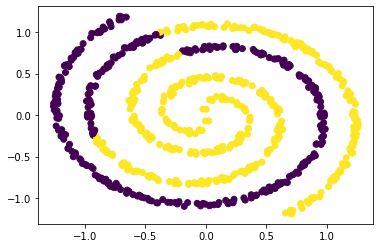

In [53]:
### Well, it worked this time... was not the case with regression problem
%matplotlib inline
yout_ = net_.forward(xx)
out_ = (yout_>0.5).reshape(-1)
plt.scatter(x1, x2, c=out_)

## Add New Layer to the first layer

In [54]:
n_hidden2 = 5
optimizer = tnn.SGD()
w1_layer = tnn.WeightsLayer(2, n_hidden2, optimizer=optimizer)
w2_layer = tnn.WeightsLayer(n_hidden2, n_hidden, optimizer=optimizer)

for epoch in range(100000):
    wout = w2_layer.forward(w1_layer.weights)
    dw = wout - layer1.weights
    dw1 = w2_layer.backward(dw/dw.shape[1]) 
    w1_layer.del_weights = dw1
    
    w2_layer.update()
    w1_layer.update()
    
    if epoch%10000 == 0:
        error__ = (dw**2).mean()
        print(epoch, 'Error = ', error__)

0 Error =  22.471277141981858
10000 Error =  7.298935525557412e-29
20000 Error =  7.298935525557412e-29
30000 Error =  7.298935525557412e-29
40000 Error =  7.298935525557412e-29
50000 Error =  7.298935525557412e-29
60000 Error =  7.298935525557412e-29
70000 Error =  7.298935525557412e-29
80000 Error =  7.298935525557412e-29
90000 Error =  7.298935525557412e-29


In [55]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden2,
                          weights=copy.deepcopy(w1_layer.weights),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                          weights=np.vstack([w2_layer.weights, w2_layer.weights]),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden,1,
                          weights=copy.deepcopy(layer2.weights),
                          bias = copy.deepcopy(layer2.bias),
                          optimizer=optimizer)
layer4_ = tnn.Sigmoid()

In [56]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
    net_.update()
#     layer1_.update()
#     layer2_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.4786909147158876


100 Error =  0.453537402570379


200 Error =  0.451428076817574


300 Error =  0.44858939324941394


400 Error =  0.4445412121017931


500 Error =  0.44257638836000646


600 Error =  0.4415550867616494


700 Error =  0.4389351756713995


800 Error =  0.4357433526940813


900 Error =  0.4305413704519802


1000 Error =  0.41617771621149857


1100 Error =  0.4146611799256387


1200 Error =  0.41339636345407627


1300 Error =  0.41283776164988994


1400 Error =  0.4113074770936295


1500 Error =  0.41099583913701815


1600 Error =  0.4103116507249267


1700 Error =  0.41261979830490586


1800 Error =  0.3313442127388538


1900 Error =  0.31818774482907314


2000 Error =  0.31031322749202994


2100 Error =  0.30504617243226706


2200 Error =  0.3010778486736102


2300 Error =  0.29708338940496665


2400 Error =  0.2944992256981652


2500 Error =  0.29253870362076706


2600 Error =  0.2909985617984983


2700 Error =  0.2893320834413215


2800 Error =  0.288652

TclError: invalid command name "pyimage65"

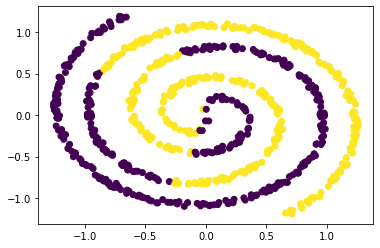

In [57]:
### this should have worked even better.. it was better in case of regression
%matplotlib inline
yout_ = net_.forward(xx)
out_ = (yout_>0.5).reshape(-1)
plt.scatter(x1, x2, c=out_)

### Training the same network from scratch

In [58]:
n_hidden2, n_hidden

(5, 5)

In [59]:
optimizer = tnn.Adam()

net_0 = tnn.AutoForm(new_layers=True)
layer1_0 = tnn.LinearLayer(2, n_hidden2,
                          optimizer=optimizer)
layer2_0 = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                                    optimizer=optimizer)
layer3_0 = tnn.DoubleReluLinearLayer(n_hidden,1,
                                    optimizer=optimizer)

In [60]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_0 = net_0.forward(xx)
    dy_0 = yout_0 - yy
    dx_0 = net_0.backward(dy_0)
    
    net_0.update()
    
    if epoch%100 == 0:
        error_0 = tnn.CrossEntropyBinary().loss(yout_0, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_0)
        ax.clear()
        
        out = (yout_0>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_0 < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  6.414667447440267


100 Error =  0.611456259711499


200 Error =  0.521434188182236


300 Error =  0.44349947081821695


400 Error =  0.3706674141695208


500 Error =  0.3010819259570738


600 Error =  0.2985277073223349


700 Error =  0.2857666095279139


800 Error =  0.2814851200013729


900 Error =  0.27934282092449925


1000 Error =  0.2758422400070015


1100 Error =  0.27009290815141823


1200 Error =  0.2590637507840985


1300 Error =  0.24919365125093093


1400 Error =  0.2461253333615445


1500 Error =  0.2453984617069057


1600 Error =  0.24485266589679036


1700 Error =  0.24456692330328114


1800 Error =  0.24588259911420585


1900 Error =  0.2445193317966465


2000 Error =  0.24465217018463467


2100 Error =  0.24503370915599185


2200 Error =  0.24486685603653754


2300 Error =  0.2446631310056343


2400 Error =  0.24363348728094433


2500 Error =  0.24611964971605751


2600 Error =  0.2473039769424787


2700 Error =  0.2438848809020934


2800 Error =  0.2430604

TclError: invalid command name "pyimage76"

In [ ]:
### It doesnt perform as good as dynamically added case
%matplotlib inline
yout_0 = net_0.forward(xx)
out = (yout_0>0.5).reshape(-1)
plt.scatter(x1, x2, c=out)

### Finding the decision boundary of the surface -- the dynamic case

In [ ]:
h = 0.01
x_, y_ = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xx_img = np.c_[x_.ravel(), y_.ravel()]
yout_img = net_.forward(xx_img)
# out = (yout_img>0.5).reshape(-1).astype(int)
out = yout_img

colors = ['r', 'y', 'g', 'b']
plt.imshow(out.reshape(x_.shape), interpolation='nearest',
           extent=(x_.min(), x_.max(), y_.min(), y_.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')